<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(VGG_16)_Pepper_Plant_Village_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1989 images belonging to 2 classes.
Found 496 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
63/63 [==============================] - 954s 15s/step - loss: 2.7323 - accuracy: 0.7381 - val_loss: 0.3796 - val_accuracy: 0.8569
Epoch 2/5
63/63 [==============================] - 936s 15s/step - loss: 0.2335 - accuracy: 0.9035 - val_loss: 0.3021 - val_accuracy: 0.9315
Epoch 3/5
63/63 [==============================] - 934s 15s/step - loss: 0.1931 - accuracy: 0.9487 - val_loss: 0.2449 - val_accuracy: 0.9234
Epoch 4/5
63/63 [==============================] - 936s 15s/step - loss: 0.1558 - accuracy: 0.9563 - val_loss: 0.1762 - val_accuracy: 0.9496
Epoch 5/5
16/16 [==============================] - 187s 12s/step - loss: 0.2564 - accuracy: 0.9536
Test Accuracy: 0.9536290168762207
16/16 [==============================] - 186s 12s/step


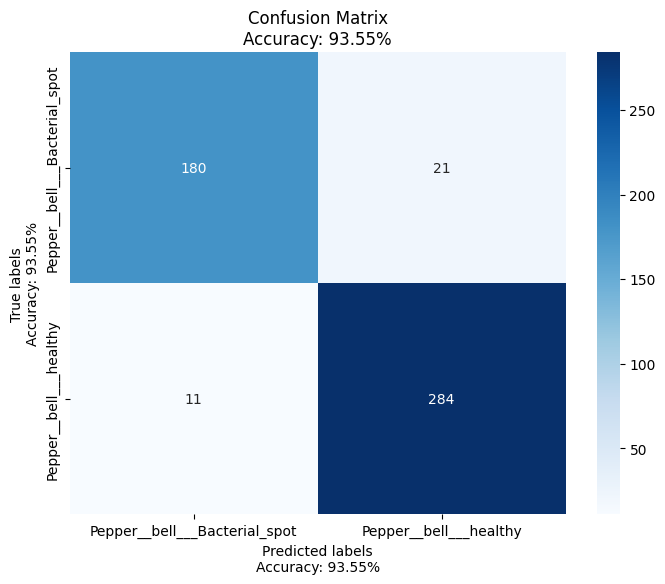

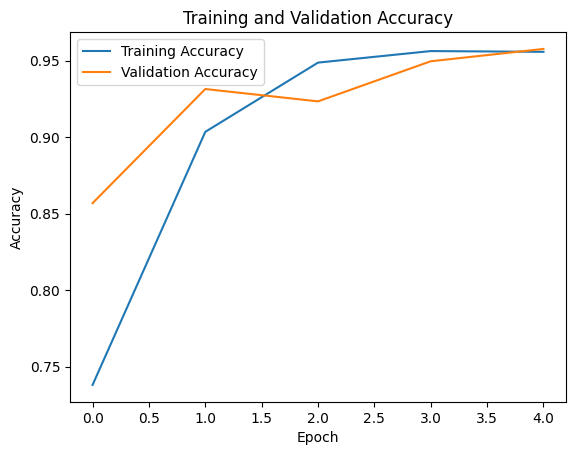

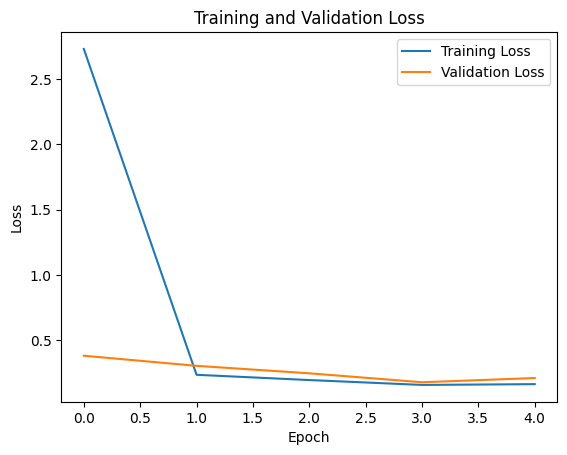

Predicted class name: Pepper__bell___Bacterial_spot


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import VGG16

# Define classes
classes = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy"]

# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Pepper"

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Resizing images to 224x224 to match the input shape of VGG16
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

# Load the VGG16 model with pretrained weights on ImageNet
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Define your custom classification layers without dropout
x = layers.Flatten()(vgg_model.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

# Create the model
model = models.Model(vgg_model.input, output)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Get the predicted classes for the test data
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)
